# **Develop a model to predict individual medical insurance charges based on personal attributes.**

In [137]:
# 1. Imports and data load
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset (file is provided in the notebook environment)
df = pd.read_csv('insurance.csv')
print('Data loaded. Rows:', df.shape[0], 'Columns:', df.shape[1])
df.head()

Data loaded. Rows: 1338 Columns: 7


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Basic Info & Summary *Statistics*

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [139]:
# Summary statistics (numeric)
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


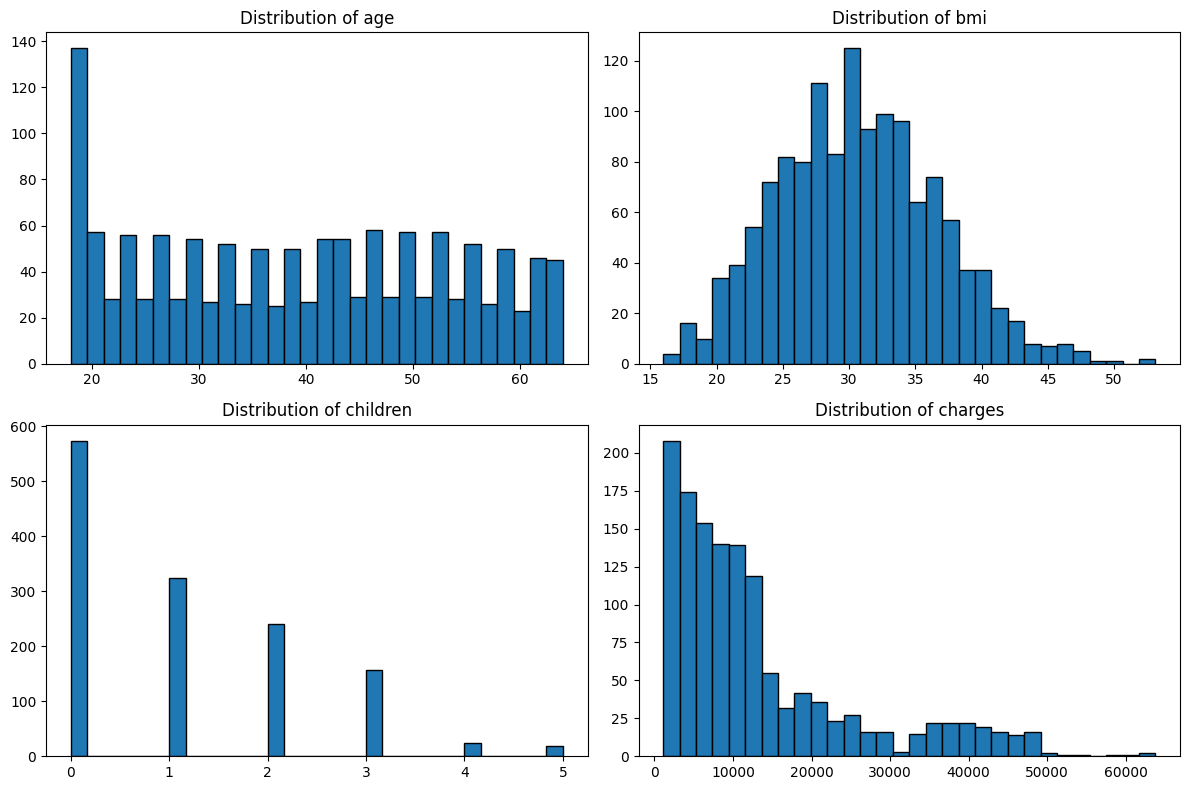

In [140]:
fig, axes = plt.subplots(2,2, figsize=(12,8))

axes = axes.flatten()
cols = ['age','bmi','children','charges']
for ax, col in zip(axes, cols):
    ax.hist(df[col], bins=30, edgecolor='black')
    ax.set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [141]:
#Categorical Counts (sex, smoker, region)


Value counts for sex
sex
male      676
female    662
Name: count, dtype: int64

Value counts for smoker
smoker
no     1064
yes     274
Name: count, dtype: int64

Value counts for region
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


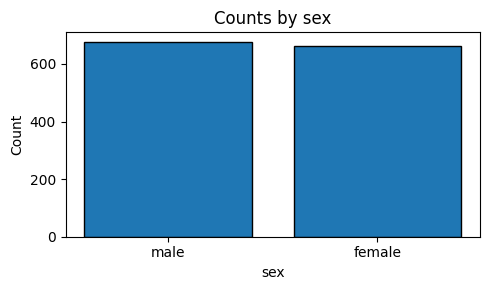

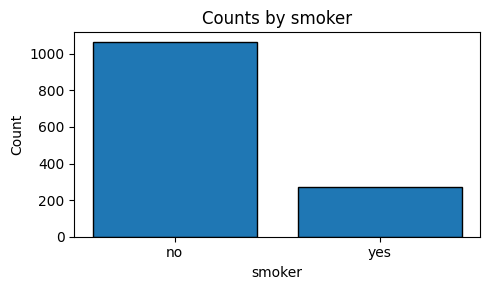

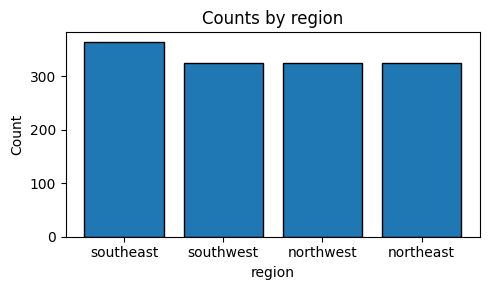

In [142]:
for col in ['sex','smoker','region']:
    print('\nValue counts for', col)
    print(df[col].value_counts())

# Simple bar plots
for col in ['sex','smoker','region']:
    plt.figure(figsize=(5,3))
    vc = df[col].value_counts()
    plt.bar(vc.index.astype(str), vc.values, edgecolor='black')
    plt.title(f'Counts by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()


# Relationships with target (scatter plots )

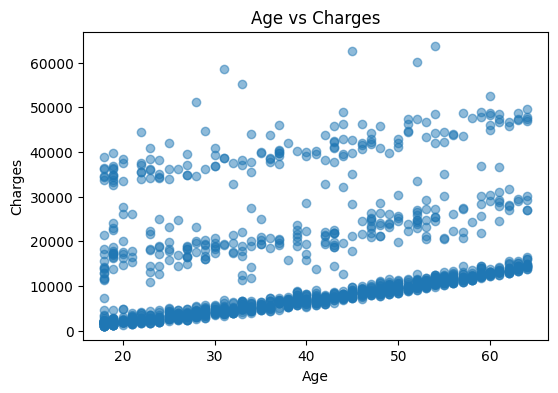

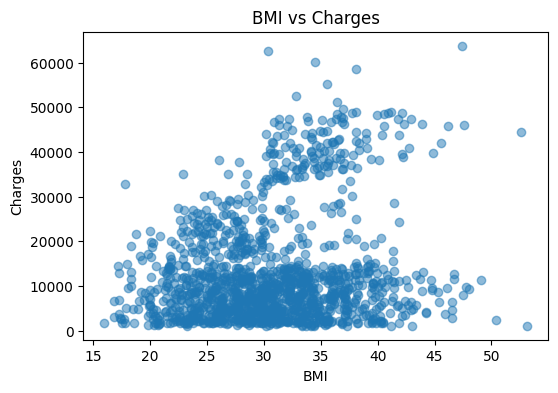

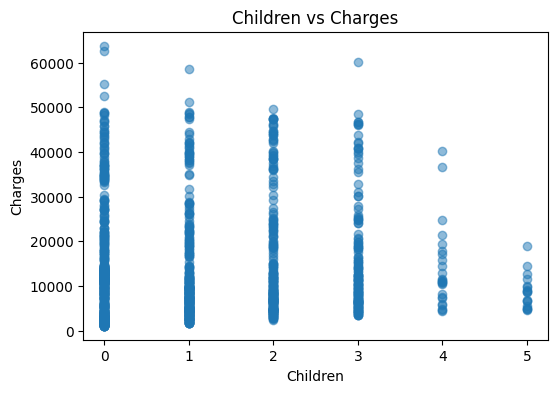

In [143]:
plt.figure(figsize=(6,4))
plt.scatter(df['age'], df['charges'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age vs Charges')
plt.show()

plt.figure(figsize=(6,4))
plt.scatter(df['bmi'], df['charges'], alpha=0.5)
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('BMI vs Charges')
plt.show()

plt.figure(figsize=(6,4))
plt.scatter(df['children'], df['charges'], alpha=0.5)
plt.xlabel('Children')
plt.ylabel('Charges')
plt.title('Children vs Charges')
plt.show()




In [144]:
df['sex'].value_counts()


,count
sex,
male,676
female,662


In [145]:
df['smoker'].value_counts()


,count
smoker,
no,1064
yes,274


In [146]:
df['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


In [147]:
df.corr(numeric_only=True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


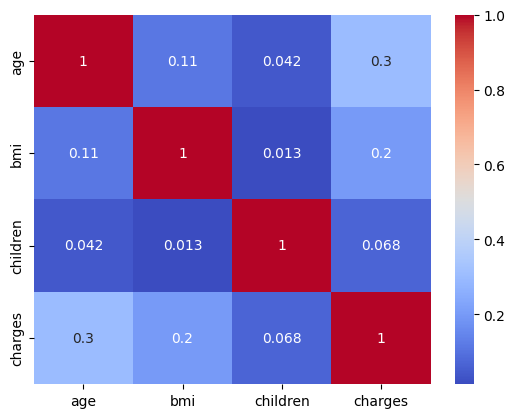

In [148]:
# Visualize correlation matrix
nu=df.select_dtypes(np.number)
corr=nu.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

In [149]:
# Features and target
X = df.drop("charges", axis=1)
y = df["charges"]

categorical = ['sex','smoker','region']
numeric = ['age','bmi','children']

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first'), categorical)
], remainder='passthrough')

In [150]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linreg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

linreg.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('regressor', LinearRegression())])

In [151]:
#prediction
from sklearn.metrics import mean_squared_error, r2_score


y_pred = linreg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R²:", r2)

RMSE: 5796.284659276275
R²: 0.7835929767120722


# Short Summary
Smoking has the largest positive effect on charges.
Age and BMI have positive effects.
# Model R² ~0.78 which indicates a good fit.

In [152]:
#Interpret Model
ohe = linreg.named_steps['preprocessor'].named_transformers_['cat']
encoded_cols = ohe.get_feature_names_out(categorical)
all_features = list(encoded_cols) + numeric

coef = linreg.named_steps['regressor'].coef_
pd.DataFrame({'Feature': all_features, 'Coefficient': coef})


,Feature,Coefficient
0,sex_male,-18.591692
1,smoker_yes,23651.128856
2,region_northwest,-370.677326
3,region_southeast,-657.864297
4,region_southwest,-809.799354
5,age,256.975706
6,bmi,337.092552
7,children,425.278784
